In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [5]:
data = pd.read_csv('apex_legends_one.txt', delimiter='\t')

In [6]:
def corpus_length(corpus):
  data = pd.read_csv(corpus, delimiter='\t')
  return len(data)

In [7]:
apex_corpus = ['apex_legends_one.txt', 'apex_legends_two.txt', 'apex_legends_three.txt', 'apex_legends_four.txt']
dauntless_corpus = ['dauntless_one.txt', 'dauntless_two.txt', 'dauntless_three.txt', 'dauntless_four.txt']
fortnite_corpus = ['fortnite_one.txt', 'fortnite_two.txt', 'fortnite_three.txt', 'fortnite_four.txt']
minecraft_corpus = ['minecraft_one.txt', 'minecraft_two.txt', 'minecraft_three.txt']
rocket_league_corpus = ['rocket_league_two.txt', 'rocket_league_three.txt', 'rocket_league_four.txt']

for i in rocket_league_corpus:
  print(corpus_length(i))

452
448
436


In [8]:
corpus_length('minecraft_three.txt')

496

In [9]:
def text_analysis(corpus):
  corpus_data = pd.read_csv(corpus, delimiter="\t")
  corpus_comments = corpus_data['comments']
  corpus_comments_strings = str(corpus_comments)
  corpus_tokens = nltk.tokenize.word_tokenize(corpus_comments_strings)
  corpus_comments_clean = [ps.stem(word) for word in corpus_tokens if word.isalpha() if not word in set(stopwords.words('english'))]
  freq_dist = nltk.FreqDist(corpus_comments_clean)
  freq_dist.plot(40, cumulative=True)
  corpus_text = nltk.Text(corpus_comments_strings)
  print('\n')
  freq_dist.tabulate(10)
  print(f'\n Amount of Words: {len(corpus_tokens)}')
  print(f'\n Vocabulary: {sorted(set(corpus_tokens))}')
  print(f'\n Vocabulary Size: {len(set(corpus_tokens))}')
  print('\n')
  print(f'\n Amount of Words in Clean Corpus: {len(corpus_comments_clean)}')
  print(f'\n Vocabulary Clean Corpus: {sorted(set(corpus_comments_clean))}')
  print(f'\n Vocabulary Size of Clean Corpus: {len(set(corpus_comments_clean))}')
  #print(corpus_comments_clean[:-2])
  wordcloud = WordCloud(width = 1400,
                      height = 800,
                      stopwords = stop_words,
                      min_font_size = 12,
                      random_state=1,
                      collocations=True,
                      colormap='tab20c').generate(' '.join(corpus_tokens))
  plt.figure(figsize = (10, 6), facecolor = None)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.savefig(f'wordcloud {corpus}.png', format='png', dpi=150, bbox_inches='tight')
  plt.axis('off')
  plt.show()

APEX LEGENDS

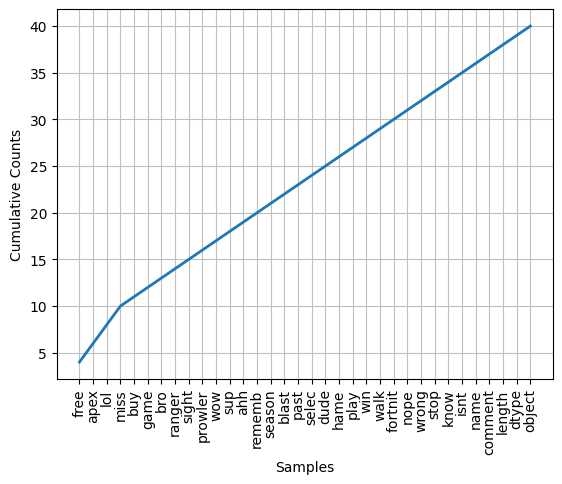



   free    apex     lol    miss     buy    game     bro  ranger   sight prowler 
      4       2       2       2       1       1       1       1       1       1 

 Amount of Words: 88

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'ahh', 'apex', 'at', 'before', 'blast', 'bro', 'buy', 'comments', 'dtype', 'dude', 'fortnite', 'free', 'from', 'game', 'had', 'hame', 'have', 'i', 'is', 'isnt', 'it', 'know', 'lol', 'miss', 'my', 'nope', 'object', 'on', 'past', 'play', 'prowler', 'ranger', 'remember', 's', 'season', 'selec', 'should', 'sight', 'stopped', 'sup', 't', 'the', 'this', 'to', 'walk', 'was', 'win', 'wow', 'wrong', 'you']

 Vocabulary Size: 67



 Amount of Words in Clean Corpus: 40

 Vocabulary Clean Corpus: ['ahh', 'apex', 'blast', 'bro', 'buy', 'comment', 'dtype', 'dude', 'fortnit', 'free', 'game', 'hame', 'isnt', 'know', 'length', 'lol', 'miss', 'name', 'nope', 'object', 'past', 'play', 'prowler', 'range

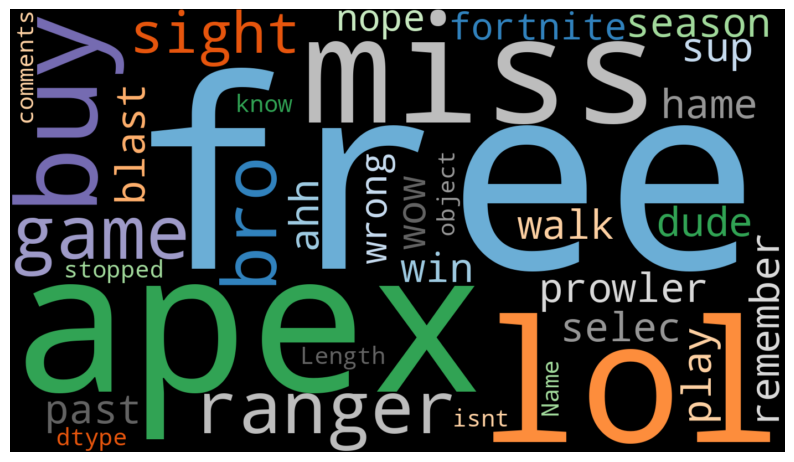

In [10]:
text_analysis('apex_legends_comments.txt')

In [11]:
def likes(text,amount,direction):
  data = pd.read_csv(text)
  data_frame = pd.DataFrame(data)
  by_likes = data_frame.loc[:, ['amount_of_likes', 'comment']].drop_duplicates().sort_values(by='amount_of_likes', ascending=direction, ignore_index=True)[:amount]
  return by_likes

In [12]:
likes('apex_legends_one.txt', 10, False)

amount_of_likes                                            comment
0               17  So this got randomly recommended to me. I know...
1               10  2 years later. And to watch what it was in the...
2               10  Serch Elitecheatz and buy APEX cheats with ESP...
3                9  Serch Elitecheatz and buy APEX cheats with ESP...
4                8  Serch Elitecheatz and buy APEX cheats with ESP...
5                7  Serch Elitecheatz and buy APEX cheats with ESP...
6                7  The sliding jumping stuff makes me feel like I...
7                4      I'm back 2 years later just to see the old kc
8                3  I barely got through this without vomiting fro...
9                3  "Before you buy"\n\n\n\n\nYes, I need to be su...

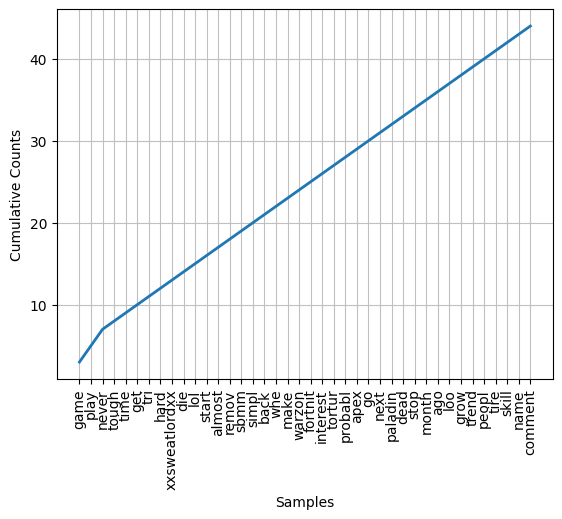



         game          play         never         tough          time           get           tri          hard xxsweatlordxx           die 
            3             2             2             1             1             1             1             1             1             1 

 Amount of Words: 115

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'after', 'ago', 'almost', 'and', 'apex', 'are', 'as', 'back', 'be', 'been', 'comments', 'dead', 'dtype', 'dying', 'for', 'fortnite', 'game', 'games', 'getting', 'going', 'growing', 'had', 'hard', 'having', 'i', 'in', 'interesting', 'into', 'is', 'it', 'just', 'll', 'lol', 'loo', 'm', 'makes', 'me', 'months', 'never', 'next', 'object', 'of', 'paladins', 'people', 'playing', 'probably', 'remove', 's', 'sbmm', 'simple', 'skill', 'started', 'stopped', 'that', 'the', 'then', 'they', 'time', 'tired', 'to', 'torture', 'tough', 'trend', 'try', 've', 'warzone', 'what', 'whe

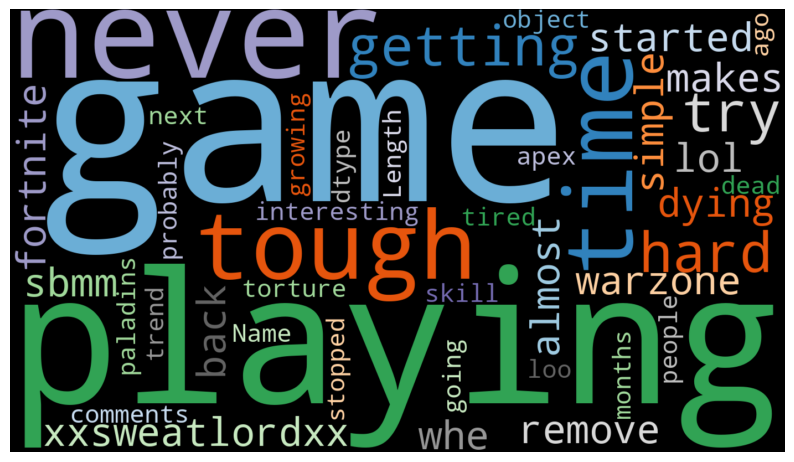

In [13]:
text_analysis('apex_legends_two_comments.txt')

In [14]:
likes('apex_legends_two.txt', 10, False)

amount_of_likes                                            comment
0              104  I've been having a tough time getting into the...
1                8  Love the fact that this video not only brings ...
2                3  To this day after all the explanations they ga...
3                1  I’m so bored of this game now. It makes me sad...
4                1                 Enough apex, I want Titanfall back
5                1  Lol Apex is a good game it’s just been out for...
6                1  Been playing since it started and still haven’...
7                1  SO TIRED this whiole month i come across full ...
8                1  Apex is a case study in how to mismanage a pla...
9                1  I think new and shiny content is just a band-a...

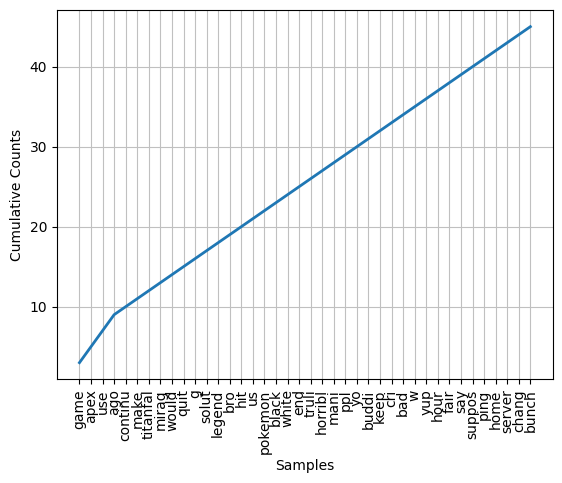



    game     apex      use      ago  continu     make titanfal    mirag    would     quit 
       3        2        2        2        1        1        1        1        1        1 

 Amount of Words: 127

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'ago', 'and', 'apex', 'at', 'bad', 'be', 'black', 'bro', 'buddy', 'bunch', 'but', 'changed', 'comments', 'continued', 'crying', 'dtype', 'ending', 'fair', 'for', 'g', 'game', 'good', 'have', 'hit', 'home', 'horrible', 'hours', 'i', 'if', 'into', 'is', 'it', 'its', 'just', 'keep', 'legends', 'm', 'making', 'many', 'mirage', 'my', 'object', 'of', 'on', 'ping', 'pokemon', 'ppl', 'quit', 're', 's', 'say', 'server', 'should', 'skins', 'so', 'solution', 'supposed', 't', 'the', 'they', 'this', 'titanfall', 'to', 'too', 'truly', 'us', 'used', 'using', 've', 'w', 'weren', 'while', 'white', 'with', 'would', 'years', 'yo', 'you', 'yup']

 Vocabulary Size: 96



 Amount of W

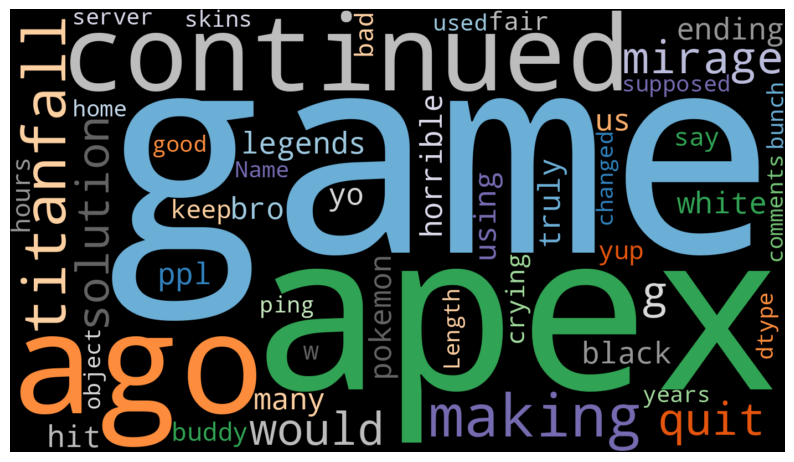

In [15]:
text_analysis('apex_legends_three_comments.txt')

In [16]:
likes('apex_legends_three.txt', 10, False)

amount_of_likes                                            comment
0                3             People still play Apex in 2023/2024? 😮
1                1  they should’ve just continued making titanfall...
2                1                          Funny ass video but truth
3                1                       i hope this video goes viral
4                1  I literally disliked the video at the Rat stuf...
5                1  I felt like people should have been expecting ...
6                1  With the lack in standard this game is on its ...
7                1  Apex is so annoying now. I Played since season...
8                1  Respawn is taking the bungie approach.. have n...
9                1                Everyone send this and spam respawn

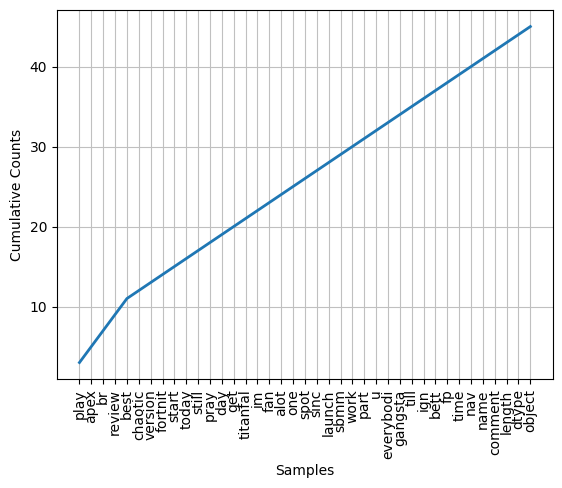



   play    apex      br  review    best chaotic version fortnit   start   today 
      3       2       2       2       2       1       1       1       1       1 

 Amount of Words: 98

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'about', 'all', 'alot', 'an', 'apex', 'been', 'best', 'bett', 'br', 'brs', 'but', 'chaotic', 'comments', 'day', 'doesn', 'dtype', 'everybody', 'fan', 'for', 'fortnite', 'fps', 'gangsta', 'get', 'i', 'ign', 'im', 'is', 'just', 'launch', 'more', 'nav', 'object', 'of', 'on', 'one', 'part', 'play', 'playing', 'praying', 'review', 'reviewer', 'sbmm', 'since', 'spot', 'started', 'still', 't', 'the', 'this', 'till', 'time', 'titanfall', 'today', 'u', 'version', 'we', 'work']

 Vocabulary Size: 74



 Amount of Words in Clean Corpus: 45

 Vocabulary Clean Corpus: ['alot', 'apex', 'best', 'bett', 'br', 'chaotic', 'comment', 'day', 'dtype', 'everybodi', 'fan', 'fortnit', 'fp', 'gangsta', 'get'

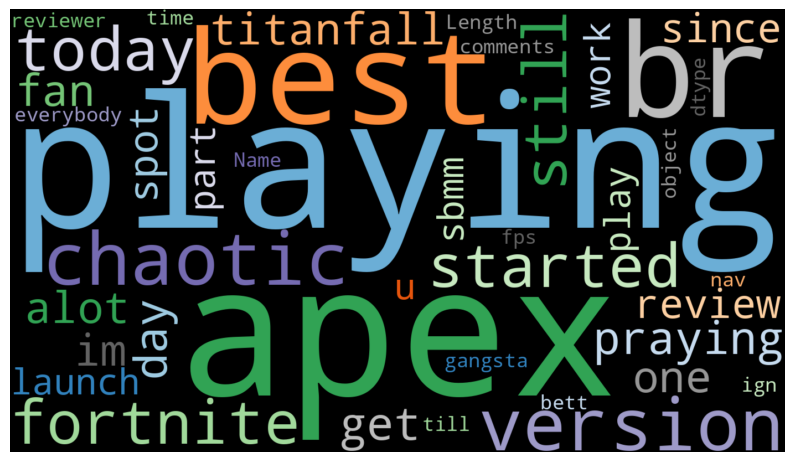

In [17]:
text_analysis('apex_legends_four_comments.txt')

In [18]:
likes('apex_legends_four.txt', 10, False)

amount_of_likes                                            comment
0               22  Serch Elitecheatz and buy APEX cheats with ESP...
1               14  Serch Elitecheatz and buy APEX cheats with ESP...
2               12  Serch Elitecheatz and buy APEX cheats with ESP...
3               10  Serch Elitecheatz and buy APEX cheats with ESP...
4                9  Serch Elitecheatz and buy APEX cheats with ESP...
5                4  Everybody gangsta till an ign reviewer is bett...
6                3  Well done to Stella Chung for an accurate and ...
7                3             Isn’t a review suppose to be unbiased?
8                3  "If they kill you, they're better. If you kill...
9                2  did you just say that attatchments ''fit to yo...

DAUNTLESS

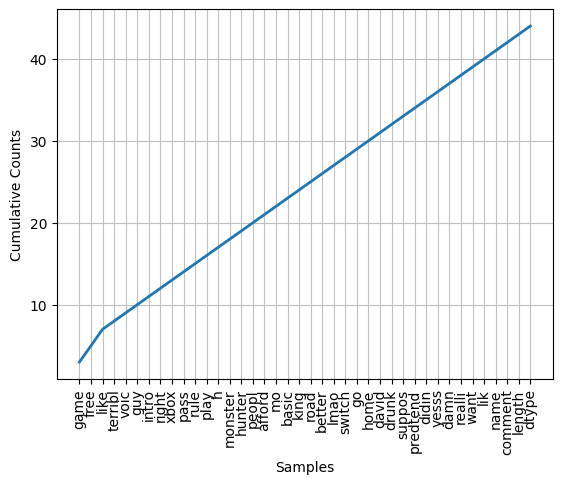



   game    free    like terribl    voic     guy   intro   right    xbox    pass 
      3       2       2       1       1       1       1       1       1       1 

 Amount of Words: 105

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'afford', 'are', 'basically', 'been', 'better', 'but', 'can', 'comments', 'damn', 'david', 'didin', 'drunk', 'dtype', 'for', 'free', 'game', 'games', 'go', 'guy', 'h', 'home', 'hunter', 'i', 'in', 'intro', 'is', 'it', 'just', 'kings', 'lik', 'like', 'lmao', 'mo', 'monster', 'now', 'object', 'on', 'over', 'pass', 'people', 'play', 'predtend', 're', 'really', 'right', 'road', 'rule', 's', 'same', 'supposed', 'switch', 't', 'terrible', 'that', 'the', 'there', 'to', 've', 'voice', 'wanting', 'we', 'xbox', 'yesss', 'you']

 Vocabulary Size: 81



 Amount of Words in Clean Corpus: 45

 Vocabulary Clean Corpus: ['afford', 'basic', 'better', 'comment', 'damn', 'david', 'didin', 'drunk', 'dt

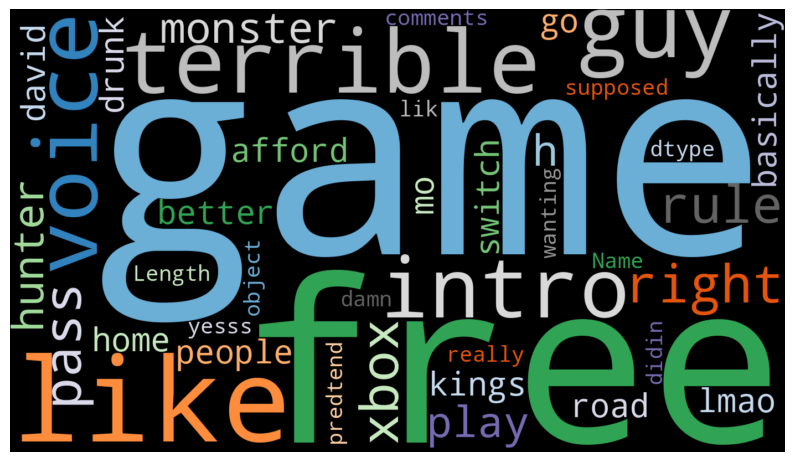

In [19]:
text_analysis('dauntless_one_comments.txt')

In [20]:
likes('dauntless_one.txt', 10, False)

amount_of_likes                                            comment
0              186  I’m surprised he didn’t say “it has a little s...
1               85  I just tried this game today and I absolutely ...
2               33  I personally like the speed, simplicity, and d...
3               14  "Mom can we have Monster Hunter World?"\n\n"No...
4                6  YESSS damn I’ve been really wanting a game lik...
5                4                           Poor mans monster hunter
6                4  Me: Mom can we get Monster Hunter World\nMom: ...
7                4  Monster Hunter for people that can't afford Mo...
8                3  Plenty of potential for the game, I’d love a o...
9                2  Ok so the guys that make these games are just ...

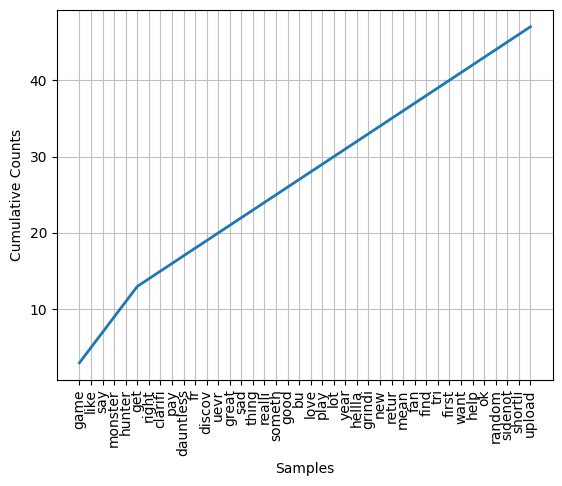



     game      like       say   monster    hunter       get     right   clarifi       pay dauntless 
        3         2         2         2         2         2         1         1         1         1 

 Amount of Words: 124

 Vocabulary: [',', '...', '0', '1', '2', '3', '355', '356', '357', '358', '359', '360', '4', ':', 'Length', 'Name', 'a', 'after', 'and', 'any', 'because', 'bu', 'clarify', 'comments', 'd', 'dauntless', 'discovered', 'dtype', 'fan', 'find', 'first', 'for', 'fr', 'further', 'game', 'get', 'good', 'great', 'grindy', 'had', 'hellla', 'help', 'hunter', 'i', 'if', 'in', 'is', 'it', 'just', 'like', 'lot', 'loved', 'm', 'mean', 'monster', 'new', 'object', 'of', 'ok', 'only', 'or', 'pay', 'played', 'random', 'really', 'retur', 'right', 'sad', 'say', 'shortly', 'sidenote', 'so', 'something', 'the', 'they', 'thi', 'thing', 'this', 'to', 'try', 'uevr', 'uploading', 'want', 'when', 'year', 'you']

 Vocabulary Size: 86



 Amount of Words in Clean Corpus: 53

 Vocabulary Clea

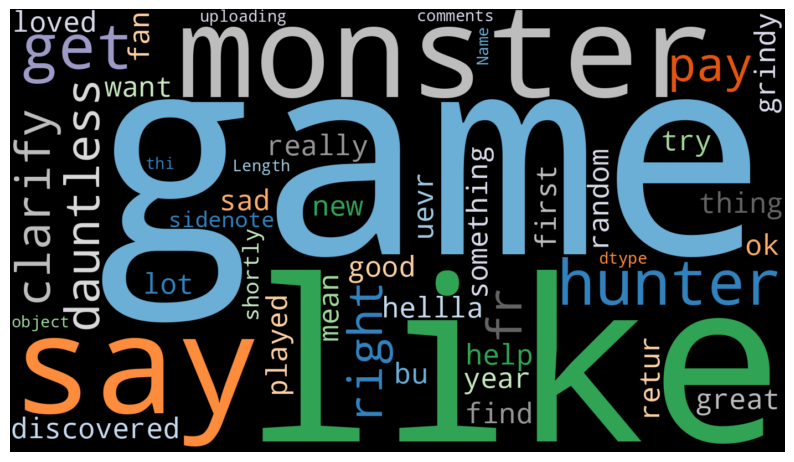

In [21]:
text_analysis('dauntless_two_comments.txt')

In [22]:
likes('dauntless_two.txt', 10, False)

amount_of_likes                                            comment
0              191  I actually prefer Dauntless over MH. It's much...
1               96  heres what ill say as a person whos been with ...
2               81  Right I'd just like to clarify. when I say thi...
3               30  Though Dauntless hasn't been in the greatest s...
4               23  This game is great in the midgame i would say ...
5               13  I actually prefer playing Dauntless over MH, b...
6               12  it is worth the time, it get easier when you g...
7               11  I initially got into MH on the PSP way back wh...
8                8  i love dauntless, i leftt t it for about 1.5 y...
9                8     Dauntless is just better than MH in my opinion

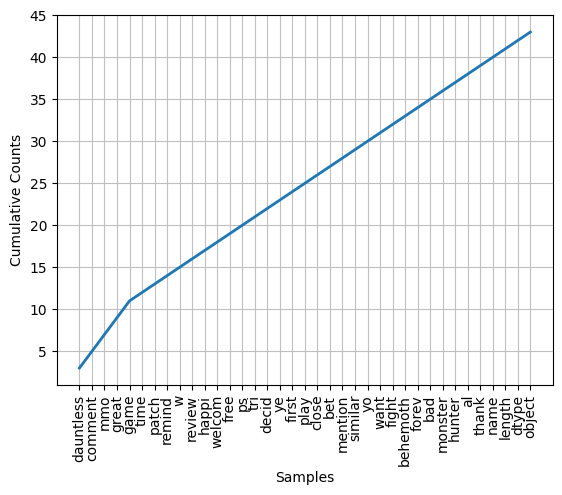



dauntless   comment       mmo     great      game      time     patch    remind         w    review 
        3         2         2         2         2         1         1         1         1         1 

 Amount of Words: 118

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'al', 'an', 'and', 'at', 'bad', 'be', 'behemoth', 'bet', 'but', 'closed', 'comment', 'comments', 'd', 'dauntless', 'decide', 'dtype', 'during', 'fight', 'first', 'for', 'forever', 'free', 'game', 'games', 'great', 'happy', 'hunter', 'i', 'is', 'isn', 'it', 'll', 'me', 'mentioning', 'mmo', 'monster', 'object', 'of', 'on', 'out', 'patch', 'played', 'ps', 'reminds', 'review', 's', 'same', 'similar', 'so', 't', 'thank', 'the', 'this', 'time', 'to', 'try', 'w', 'wants', 'we', 'welcome', 'while', 'who', 'will', 'yes', 'yo', 'you']

 Vocabulary Size: 82



 Amount of Words in Clean Corpus: 43

 Vocabulary Clean Corpus: ['al', 'bad', 'behemoth', 'bet', 'cl

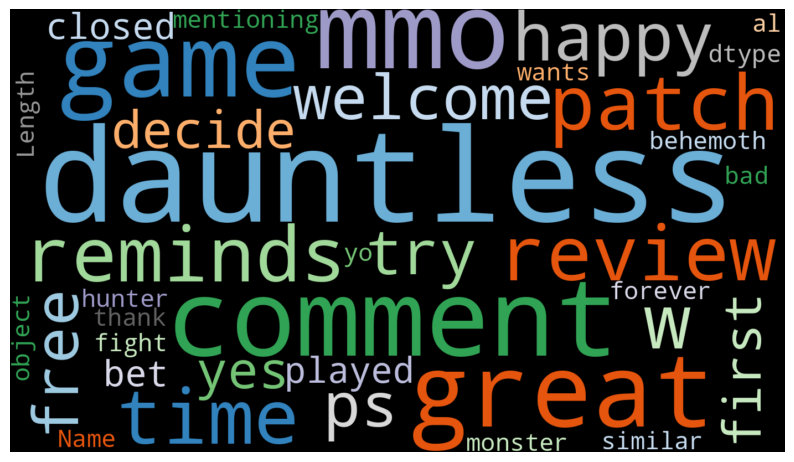

In [23]:
text_analysis('dauntless_three_comments.txt')

In [24]:
likes('dauntless_three.txt', 10, False)

amount_of_likes                                            comment
0              136  At the time of this comment, Patch 1.9.3 is ou...
1               45  I reckon this game should just add patrols and...
2                7  I played this game as soon as it came out and ...
3                3  I joined dauntless somewhere before the voidru...
4                2               so its just fortnite monster hunter?
5                2  I play dauntless with my brothers. We have a l...
6                2         The struggle not to say "Monster Hunter" 😅
7                2  I first played Dauntless during the closed bet...
8                2  While mentioning similar games to dauntless yo...
9                1                       For a free game, absolutely!

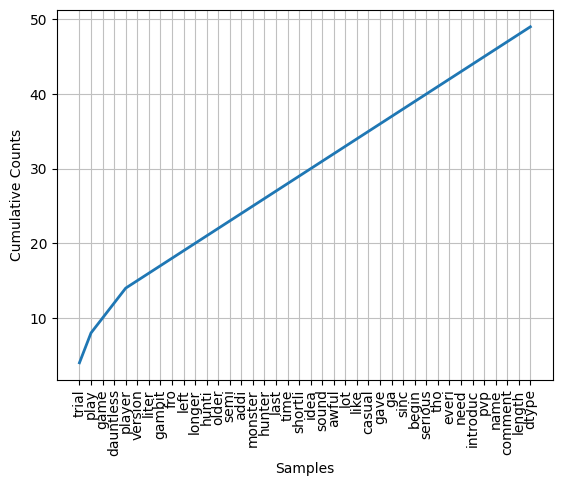



    trial      play      game dauntless    player   version     liter    gambit       fro      left 
        4         4         2         2         2         1         1         1         1         1 

 Amount of Words: 115

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'about', 'addi', 'after', 'an', 'and', 'as', 'awfull', 'be', 'before', 'beginning', 'casual', 'comments', 'dauntless', 'does', 'dtype', 'every', 'fro', 'ga', 'gambit', 'game', 'gave', 'have', 'here', 'hunter', 'hunti', 'i', 'ideas', 'introduce', 'is', 'last', 'left', 'like', 'literally', 'longer', 'lot', 'monster', 'need', 'no', 'o', 'object', 'of', 'older', 'on', 'played', 'player', 'playing', 'pvp', 'semi', 'seriously', 'shortly', 'since', 'sounds', 't', 'the', 'tho', 'time', 'to', 'trial', 'trials', 'up', 'version', 'was', 'when', 'who', 'why', 'your']

 Vocabulary Size: 82



 Amount of Words in Clean Corpus: 50

 Vocabulary Clean Corpus: ['add

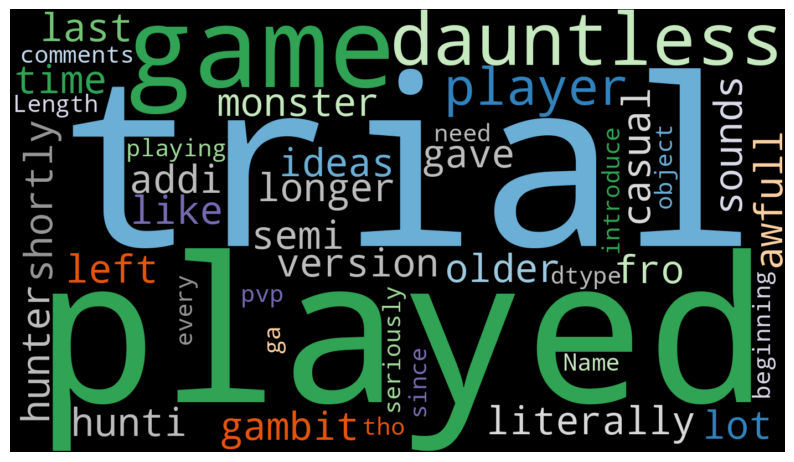

In [25]:
text_analysis('dauntless_four_comments.txt')

In [26]:
likes('dauntless_four.txt', 10, False)

amount_of_likes                                            comment
0                8  I used to play Dauntless a lot but after Refor...
1                2  What really killed the game for me was, how ma...
2                1                  Because monster hunter is better.
3                1  That team v team boss fight woulda been top ti...
4                1  I agree but how did you do that to hint with r...
5                1  are you thinking about returning to dauntless ...
6                1  I just started playing the game again and hone...
7                1  Caue they implemented PVP balancing in a PVE g...
8                1    Because it was cheap garbage in the first place
9                1  I just came back after years. Some of my weapo...

FORTNITE

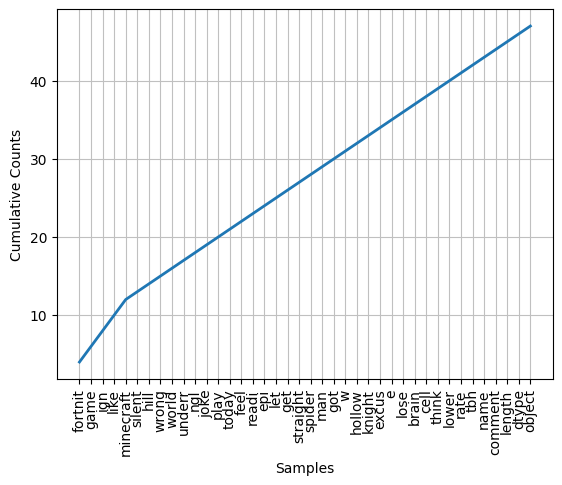



  fortnit      game       ign      like minecraft    silent      hill     wrong     world    underr 
        4         2         2         2         2         1         1         1         1         1 

 Amount of Words: 95

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'and', 'are', 'be', 'brain', 'cells', 'comments', 'dtype', 'e', 'epi', 'excuse', 'feels', 'fortnite', 'game', 'get', 'got', 'hill', 'hollow', 'i', 'ign', 'is', 'it', 'joke', 'knight', 'let', 'like', 'losing', 'lower', 'm', 'man', 'me', 'minecraft', 'ngl', 'object', 'of', 'out', 'playing', 'rate', 'ready', 'should', 'silent', 'so', 'spider', 'straight', 'such', 'tbh', 'the', 'think', 'this', 'today', 'underrated', 'w', 'what', 'with', 'world', 'wrong', 'you']

 Vocabulary Size: 73



 Amount of Words in Clean Corpus: 47

 Vocabulary Clean Corpus: ['brain', 'cell', 'comment', 'dtype', 'e', 'epi', 'excus', 'feel', 'fortnit', 'game', 'get', 'got', 

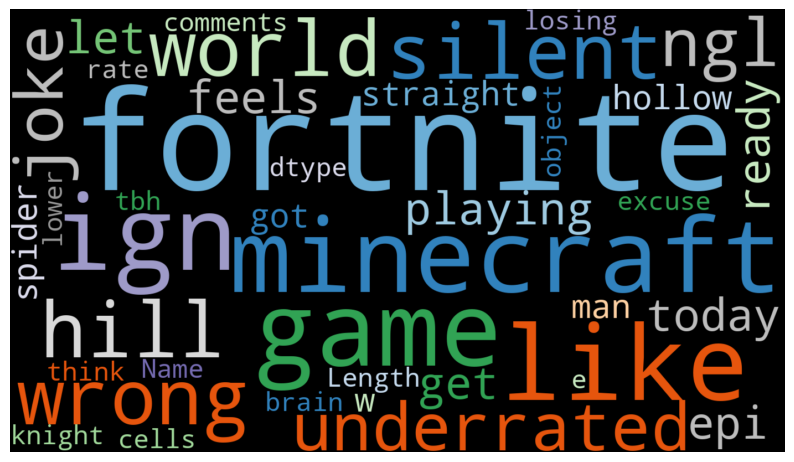

In [27]:
text_analysis('fortnite_one_comments.txt')

In [28]:
likes('fortnite_one.txt', 10, False)

amount_of_likes                                            comment
0              117  Hades: 9.0/10 \nCuphead: 8.8/10 \nHollow knigh...
1               18  People are forgetting they reviewed this a lon...
2               11  To be honest Fortnite’s not that bad of a game...
3                8                       Its funny how mad people are
4                7  Ori and the Blind Forest: 8.5\nMinecraft: 9.0\...
5                6  My fortnite review: meh.\n\nIGN fortnite revie...
6                6  this game is 0.4 points away from being called...
7                5  Fortnite: is given a higher rating\n\nLiterall...
8                5                 Fortnite - 9.6\nMinecraft 9.0\n😐😑😐
9                5         Minecraft: 9.0\nFortnite: 9.6\n\n\n\n\nwat

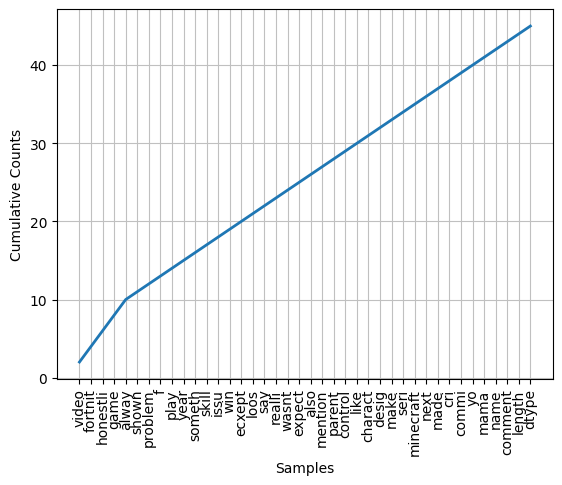



   video  fortnit honestli     game    alway    shown  problem        f     play     year 
       2        2        2        2        2        1        1        1        1        1 

 Amount of Words: 121

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'also', 'always', 'are', 'be', 'but', 'can', 'characters', 'comments', 'commy', 'controls', 'cry', 'desig', 'do', 'dtype', 'ecxept', 'expecting', 'f', 'for', 'fortnite', 'game', 'had', 'has', 'have', 'honestly', 'how', 'i', 'into', 'issue', 'it', 'like', 'loose', 'made', 'make', 'mama', 'me', 'mention', 'minecraft', 'more', 'next', 'not', 'object', 'only', 'or', 'parental', 'played', 'problems', 'really', 's', 'say', 'series', 'shown', 'skill', 'so', 'some', 'somethings', 'that', 'the', 'this', 'to', 'video', 'wasnt', 'when', 'why', 'win', 'with', 'years', 'yo', 'you']

 Vocabulary Size: 85



 Amount of Words in Clean Corpus: 46

 Vocabulary Clean Corpus: ['also

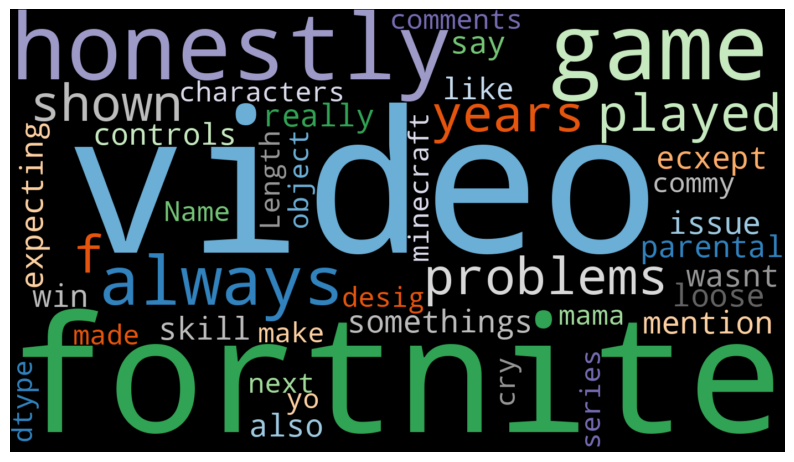

In [29]:
text_analysis('fortnite_two_comments.txt')

In [30]:
likes('fortnite_two.txt', 10, False)

amount_of_likes                                            comment
0              549  It’s with this video that I have shown you how...
1                8  I'm 75 years old and I've been playing Fortnit...
2                2  i really wasnt expecting this video to be this...
3                2                               What a dreadful game
4                2  This guy is massively under rated ever video t...
5                2  Gun play is the worst in any game i play\nEdit...
6                1                               Kameyamama.... 🤣🤣🤣🤣🤣
7                1  No Build was lifesaving for me. I’m good at sh...
8                1  Why did I watch this whole video. I fucking ha...
9                1                                     Ka may yo mama

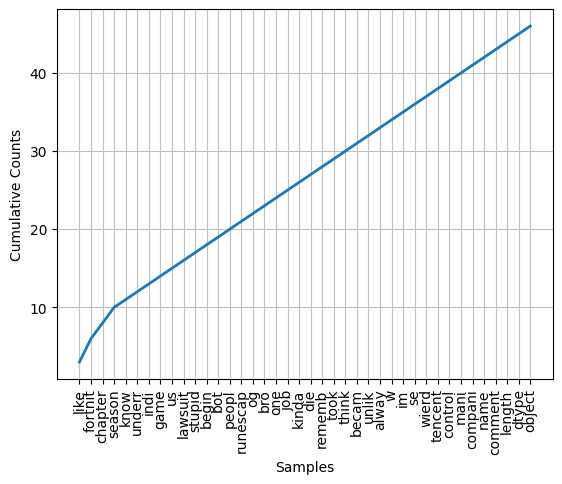



   like fortnit chapter  season    know  underr    indi    game      us lawsuit 
      3       3       2       2       1       1       1       1       1       1 

 Amount of Words: 103

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'always', 'an', 'and', 'at', 'became', 'begin', 'bots', 'bro', 'chapter', 'comments', 'companys', 'controlls', 'd', 'don', 'dtype', 'dying', 'fortnite', 'game', 'had', 'how', 'i', 'im', 'indie', 'is', 'it', 'its', 'job', 'just', 'kinda', 'know', 'lawsuit', 'like', 'many', 'now', 'object', 'og', 'one', 'people', 'remember', 'runescape', 'season', 'seing', 'so', 'stupid', 't', 'tencent', 'the', 'think', 'this', 'to', 'took', 'underrated', 'unlikeable', 'us', 'w', 'was', 'while', 'why', 'wierd', 'with', 'you']

 Vocabulary Size: 77



 Amount of Words in Clean Corpus: 46

 Vocabulary Clean Corpus: ['alway', 'becam', 'begin', 'bot', 'bro', 'chapter', 'comment', 'compani', 'control', 'die', '

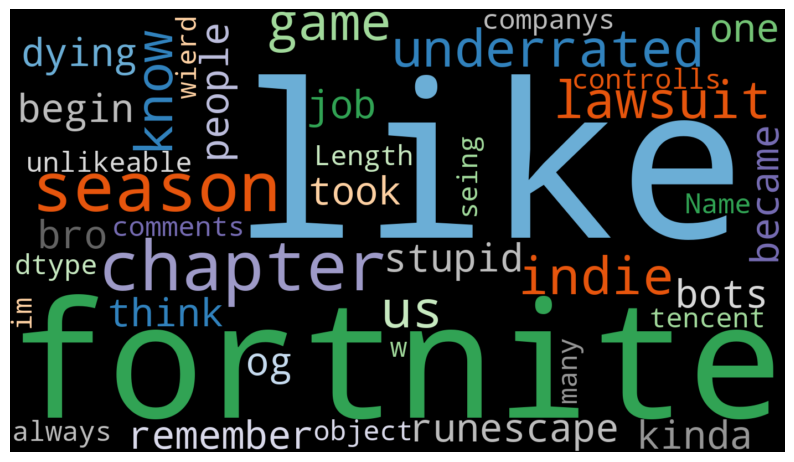

In [31]:
text_analysis('fortnite_three_comments.txt')

In [32]:
likes('fortnite_three.txt', 10, False)

amount_of_likes                                            comment
0              524  Know an underrated indie game you'd like us to...
1                3  Gen alpha ruined fortnite in creative the one ...
2                2  im seing this while fortnite is at chapter 5 s...
3                2  Another reason Fortnite hasn’t died is because...
4                2         Fortnite OG was like a reboot for fortnite
5                2  I’m sorry tho, Fortnite kinda dying is fire, s...
6                2                   Who’s watching this in chapter 5
7                2  1:08 No way he just explained what Fortnite me...
8                1                                     Fortnite Sucks
9                1  Fortnite is just a cash-grab meant to get kids...

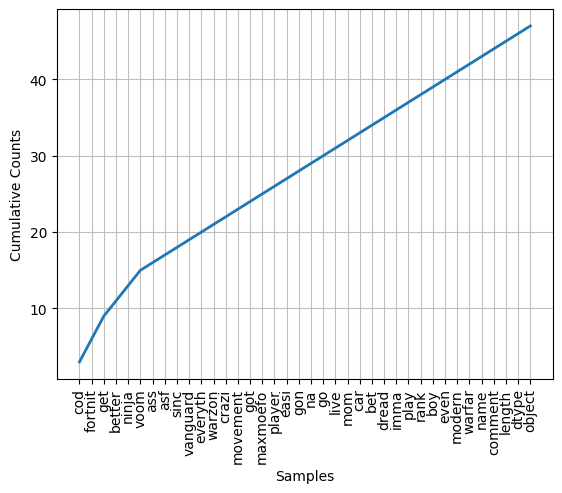



     cod  fortnit      get   better    ninja     voom      ass      asf     sinc vanguard 
       3        3        3        2        2        2        1        1        1        1 

 Amount of Words: 98

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'again', 'and', 'as', 'asf', 'ass', 'been', 'bet', 'better', 'boys', 'car', 'cod', 'comments', 'crazy', 'didn', 'do', 'dreads', 'dtype', 'easie', 'even', 'everything', 'fortnite', 'get', 'go', 'gon', 'got', 'has', 'how', 'i', 'if', 'imma', 'in', 'is', 'live', 'maxmoefoe', 'me', 'modern', 'moms', 'movement', 'my', 'na', 'ninja', 'object', 'play', 'player', 'ranked', 'since', 't', 'than', 'vanguard', 'voom', 'warfare', 'warzone', 'when', 'won', 'you']

 Vocabulary Size: 72



 Amount of Words in Clean Corpus: 47

 Vocabulary Clean Corpus: ['asf', 'ass', 'bet', 'better', 'boy', 'car', 'cod', 'comment', 'crazi', 'dread', 'dtype', 'easi', 'even', 'everyth', 'fortnit', 

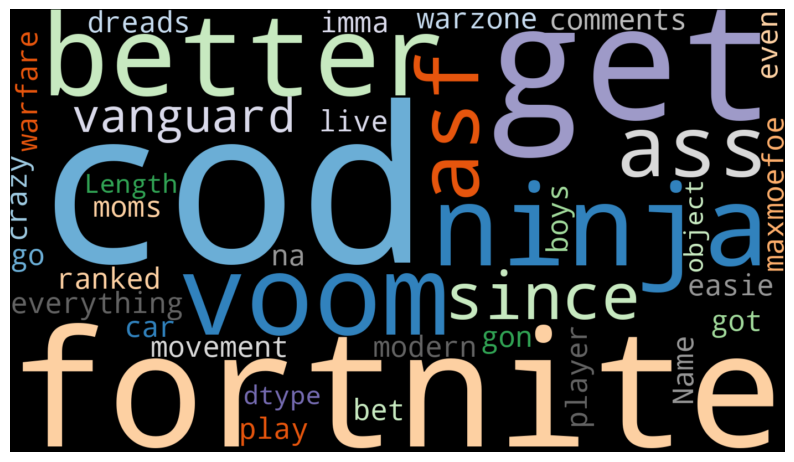

In [33]:
text_analysis('fortnite_four_comments.txt')

In [34]:
likes('fortnite_four.txt', 10, False)

amount_of_likes                                            comment
0                7  I definitely miss you guys playing Fortnite to...
1                6            Yo ninja I can bring back fortnite new🎉
2                1                           I drink from your toilet
3                1                        Always dropping w content ❤
4                1  Crazy how cod movement got better and Fortnite...
5                1             You are world's best gamer, that's it.
6                1      I love seeing these ones with the losses ..😂❤
7                1  People who think warzone is better than Fortni...
8                0  I'm not surprised that people would still play...
9                0                                    To many hackers

MINECRAFT

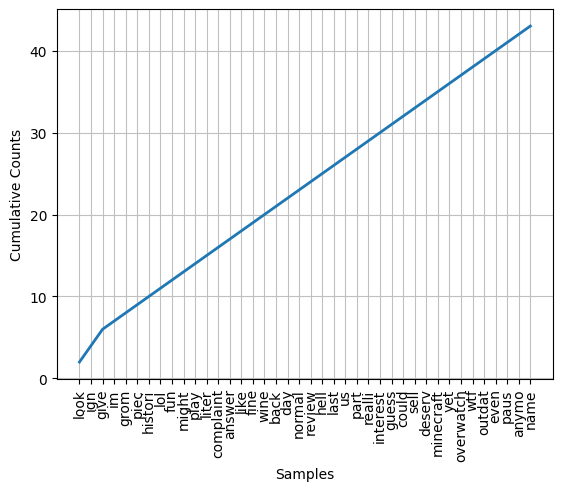



   look     ign    give      im    grom    piec histori     lol     fun   might 
      2       2       2       1       1       1       1       1       1       1 

 Amount of Words: 99

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'all', 'answer', 'anymo', 'back', 'been', 'but', 'can', 'comments', 'complaints', 'could', 'days', 'deserves', 'dtype', 'even', 'fine', 'fun', 'gives', 'grom', 'guess', 'have', 'hell', 'history', 'how', 'i', 'ign', 'im', 'in', 'interesting', 'is', 'it', 'last', 'like', 'literally', 'lol', 'looks', 'might', 'minecraft', 'normal', 'not', 'object', 'of', 'outdated', 'overwatch', 'part', 'pause', 'piece', 'play', 'really', 'reviews', 'sell', 'so', 't', 'the', 'this', 'us', 'when', 'wine', 'wtf', 'yet', 'you', 'your']

 Vocabulary Size: 78



 Amount of Words in Clean Corpus: 47

 Vocabulary Clean Corpus: ['answer', 'anymo', 'back', 'comment', 'complaint', 'could', 'day', 'deserv', 'dtype

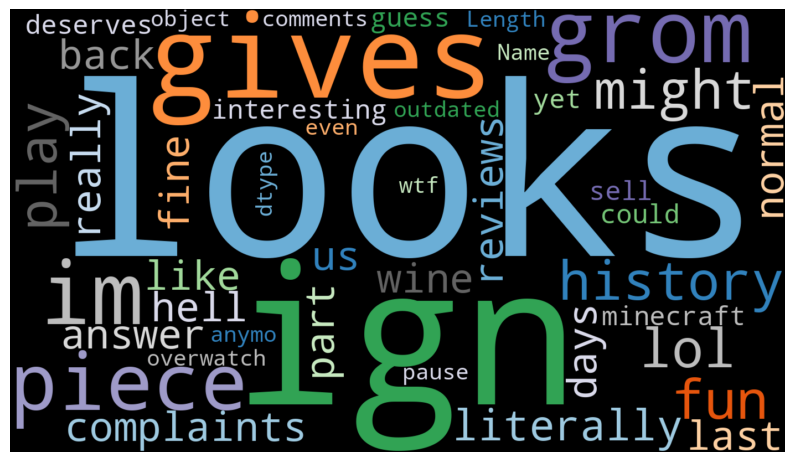

In [35]:
text_analysis('minecraft_one_comments.txt')

In [36]:
likes('minecraft_one.txt', 10, False)

amount_of_likes                                            comment
0               60  This was actually a great review when it came ...
1               15                      Endless nostalgia this video.
2                7  Minecraft, the game that ignited our childhood...
3                5  Ign gives minecraft a 9.0 yet overwatch a 10, ...
4                5         U dont play the craft u dont get the shaft
5                4  How the hell is the last of us part 2 a 10 but...
6                4  To those who have played this game. This game ...
7                3                            Its like a time machine
8                3                                  More like a 10/10
9                3                    imagine rating minecraft a 9/10

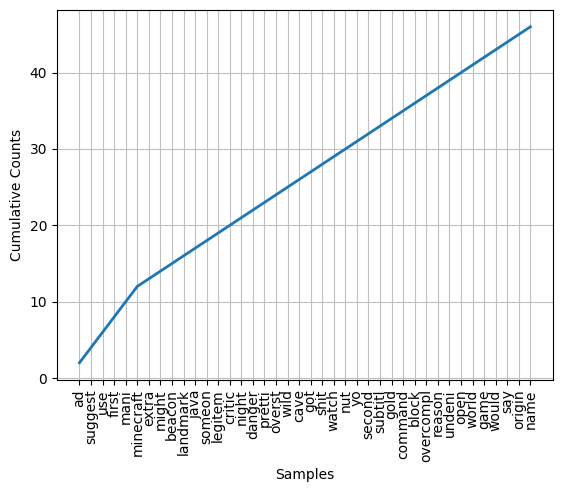



       ad   suggest       use     first      mani minecraft     extra     might    beacon  landmark 
        2         2         2         2         2         2         1         1         1         1 

 Amount of Words: 114

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'added', 'an', 'are', 'as', 'beacons', 'blocks', 'cave', 'command', 'comments', 'critical', 'danger', 'didn', 'dtype', 'extra', 'first', 'for', 'game', 'gold', 'got', 'how', 'i', 'in', 'is', 'it', 'java', 'landmarks', 'legitemately', 'many', 'might', 'minecraft', 'night', 'no', 'nuts', 'o', 'object', 'of', 'open', 'originally', 'overcomplicated', 'overstated', 'pretty', 'reason', 's', 'say', 'seconds', 'shit', 'so', 'some', 'someone', 'subtitles', 'suggestions', 't', 'that', 'the', 'these', 'this', 'to', 'undeniably', 'use', 'used', 've', 'very', 'watching', 'who', 'wild', 'with', 'world', 'would', 'yo', 'you']

 Vocabulary Size: 86



 Amount of W

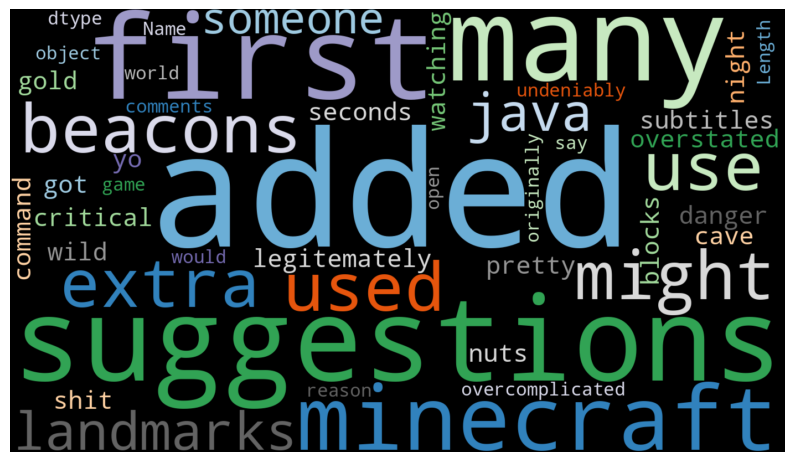

In [37]:
text_analysis('minecraft_two_comments.txt')

In [38]:
likes('minecraft_two.txt', 10, False)

amount_of_likes                                            comment
0            10816  I've added some extra suggestions so you might...
1               55  3 years later, and this video is still relevan...
2               14  I feel like at it's core, Minecraft used to be...
3               12  Would love to see an update on this. A lot of ...
4                8  I totally agree with the game having no sense ...
5                6  me watching this now and realizing he literall...
6                4  me watching this 4 years later realising bro p...
7                4  I disagree that it has been addressed by recen...
8                4  The Problem I see with Minecraft is that there...
9                4  Part of the video remains true, even if they a...

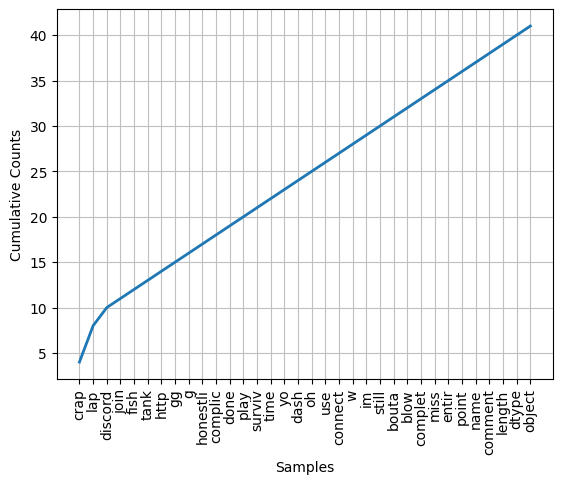



    crap      lap  discord     join     fish     tank     http       gg        g honestli 
       4        4        2        1        1        1        1        1        1        1 

 Amount of Words: 93

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'all', 'are', 'as', 'blow', 'bouta', 'but', 'comments', 'completely', 'complicated', 'connecting', 'crap', 'dashes', 'discord', 'done', 'dtype', 'entire', 'few', 'fish', 'g', 'gg', 'honestly', 'how', 'https', 'im', 'in', 'isn', 'it', 'join', 'lap', 'm', 'missed', 'my', 'object', 'of', 'oh', 'once', 'playing', 'point', 'still', 'survival', 't', 'tank', 'that', 'the', 'them', 'they', 'times', 'useful', 've', 'w', 'why', 'yo', 'you', 'your']

 Vocabulary Size: 71



 Amount of Words in Clean Corpus: 41

 Vocabulary Clean Corpus: ['blow', 'bouta', 'comment', 'complet', 'complic', 'connect', 'crap', 'dash', 'discord', 'done', 'dtype', 'entir', 'fish', 'g', 'gg', 'hones

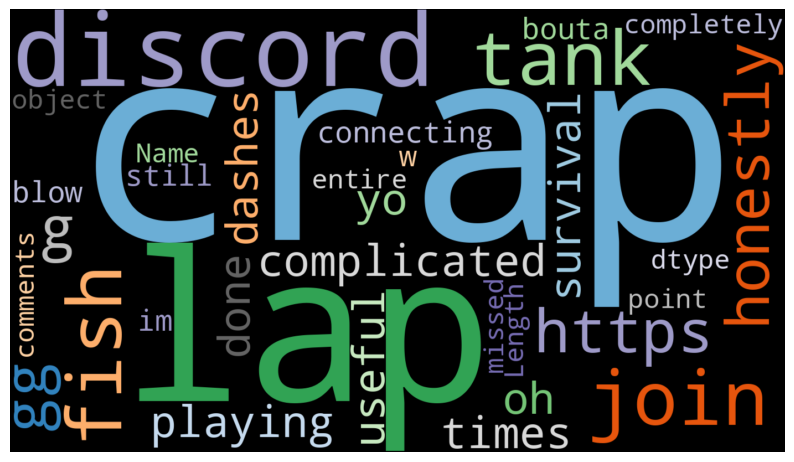

In [39]:
text_analysis('minecraft_three_comments.txt')

In [40]:
likes('minecraft_three.txt', 10, False)

amount_of_likes                                            comment
0              306  join the Fish Tank discord → https://discord.g...
1                2                                        7:04  THIS.
2                2  You've completely missed the entire point of M...
3                1                       Nah you just boring yourself
4                1  Once your done playing survival a few times yo...
5                1  This video explains on to the point ! This is ...
6                1                 Yo anyone here from div_y's video?
7                1  I think it's because watching all these youtub...
8                1  i think this need for progression is the exact...
9                1  1.20 is harder because you have to get a smith...

ROCKET LEAGUE

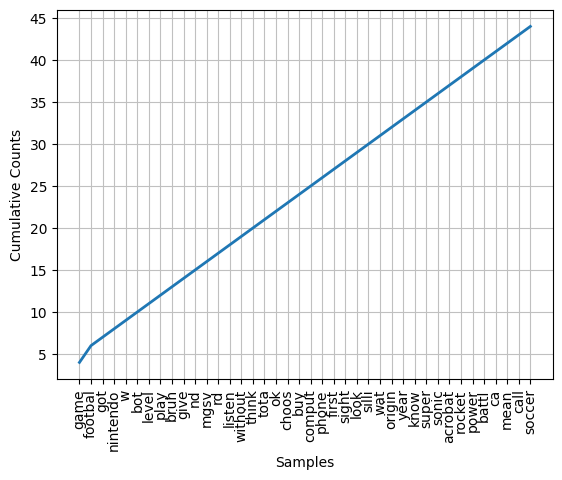



    game  footbal      got nintendo        w      bot    level     play     bruh     give 
       4        2        1        1        1        1        1        1        1        1 

 Amount of Words: 107

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'acrobatic', 'after', 'at', 'battle', 'bot', 'bruh', 'but', 'buy', 'ca', 'called', 'can', 'choosed', 'comments', 'computer', 'don', 'dtype', 'first', 'football', 'for', 'game', 'games', 'gives', 'got', 'have', 'him', 'i', 'in', 'is', 'its', 'know', 'level', 'listen', 'looked', 'mean', 'mgsv', 'most', 'my', 'nd', 'nintendo', 'not', 'object', 'of', 'ok', 'on', 'original', 'phone', 'play', 'powered', 'rd', 'rocket', 'sight', 'silly', 'soccer', 'sonic', 'super', 't', 'the', 'thinking', 'this', 'to', 'tota', 'w', 'wat', 'without', 'years', 'you']

 Vocabulary Size: 82



 Amount of Words in Clean Corpus: 49

 Vocabulary Clean Corpus: ['acrobat', 'battl', 'bot', 'bruh', 'bu

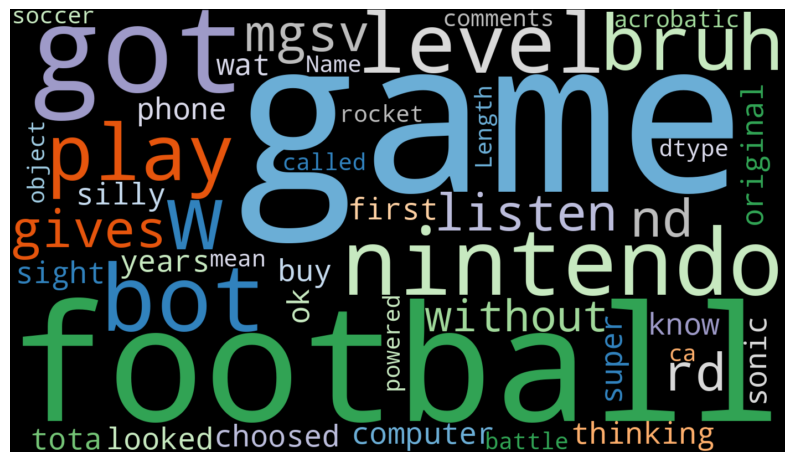

In [41]:
text_analysis('rocket_league_two_comments.txt')

In [42]:
likes('rocket_league_two.txt', 10, False)

amount_of_likes                                            comment
0              110                          This is better than Fifa 
1                7  So should I buy it? It is on steam sale right ...
2                7  How can someone reviewing a game so high inten...
3                6  This is one of the few games ever that deserve...
4                5                  This game reminds me of Top Gear.
5                5                               What was the review?
6                5  This is seriously one of the funnest games to ...
7                3  Note about the structure of this review: in th...
8                2  I really really like this game but . . .  I th...
9                2  In my opinion, this game deserves a 10/10 hand...

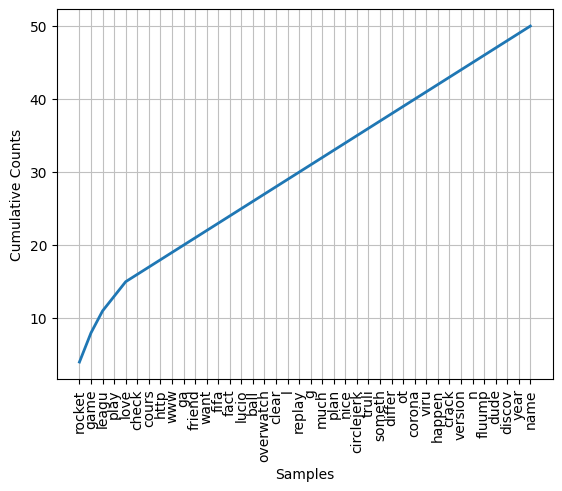



rocket   game  leagu   play   love  check  cours   http    www     ga 
     4      4      3      2      2      1      1      1      1      1 

 Amount of Words: 119

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'all', 'ball', 'check', 'circlejerk', 'clear', 'comments', 'corona', 'course', 'cracked', 'did', 'different', 'discovered', 'dtype', 'dude', 'fact', 'fifa', 'fluump', 'friends', 'from', 'g', 'ga', 'game', 'happen', 'have', 'https', 'i', 'in', 'is', 'just', 'l', 'league', 'love', 'lucio', 'ma', 'most', 'much', 'my', 'n', 'nice', 'object', 'of', 'on', 'ot', 'out', 'overwatch', 'plan', 'play', 'replayable', 'rocket', 'so', 'something', 'that', 'the', 'this', 'to', 'truly', 'version', 'virus', 'want', 'why', 'with', 'www', 'y', 'year', 'you']

 Vocabulary Size: 82



 Amount of Words in Clean Corpus: 54

 Vocabulary Clean Corpus: ['ball', 'check', 'circlejerk', 'clear', 'comment', 'corona', 'cours', 'crack

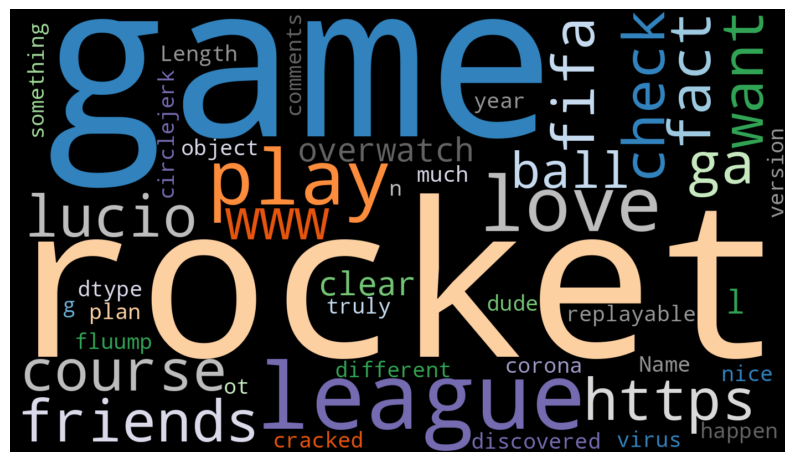

In [43]:
text_analysis('rocket_league_three_comments.txt')

In [44]:
likes('rocket_league_three.txt', 10, False)

amount_of_likes                                            comment
0               22  Check out my Rocket League course!\nhttps://ww...
1                2                   Wii Sports have entered the chat
2                2  I’ve been trying to wrap my head around why th...
3                2  I can't believe I'm just now finding this vide...
4                1  I love this guy. Even tho he is American he sa...
5                1  People that say rocket league is not a good Es...
6                1  I get your point and I'll be as simple as the ...
7                1  my firend hates this game, but when i sent him...
8                1  I honestly only downloaded it cause it was a f...
9                1           Still not convinced it’s gunna go F2P...

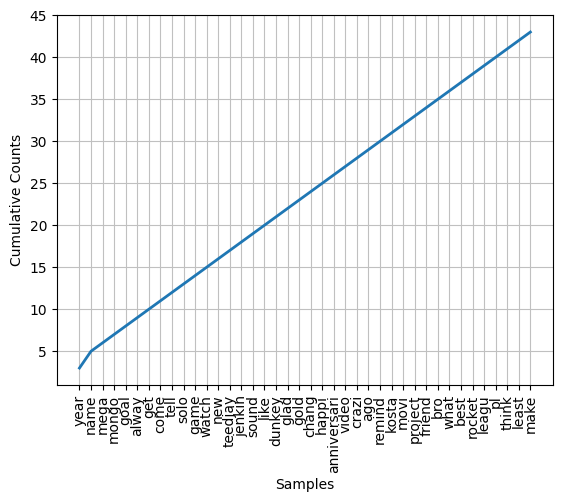



 year  name  mega mongo  goal alway   get  come  tell  solo 
    3     2     1     1     1     1     1     1     1     1 

 Amount of Words: 108

 Vocabulary: [',', '...', '0', '1', '2', '3', '395', '396', '397', '398', '399', '4', '400', ':', 'Length', 'Name', 'a', 'ago', 'always', 'and', 'anniversary', 'at', 'best', 'bro', 'can', 'changed', 'come', 'comments', 'crazy', 'd', 'dtype', 'dunkey', 'friends', 'from', 'games', 'gets', 'glad', 'goal', 'gold', 'happy', 'hasn', 'he', 'i', 'if', 'it', 'jenkins', 'kosta', 'league', 'least', 'like', 'm', 'make', 'me', 'mega', 'mongo', 'movie', 'my', 'name', 'new', 'now', 'object', 'of', 'on', 'one', 'out', 'pl', 'project', 'remind', 'rocket', 's', 'so', 'solo', 'sonic', 'sounds', 't', 'teedjay', 'telling', 'that', 'the', 'they', 'think', 'this', 'to', 'video', 'was', 'watching', 'whats', 'year', 'years', 'you']

 Vocabulary Size: 90



 Amount of Words in Clean Corpus: 49

 Vocabulary Clean Corpus: ['ago', 'alway', 'anniversari', 'best', 'bro',

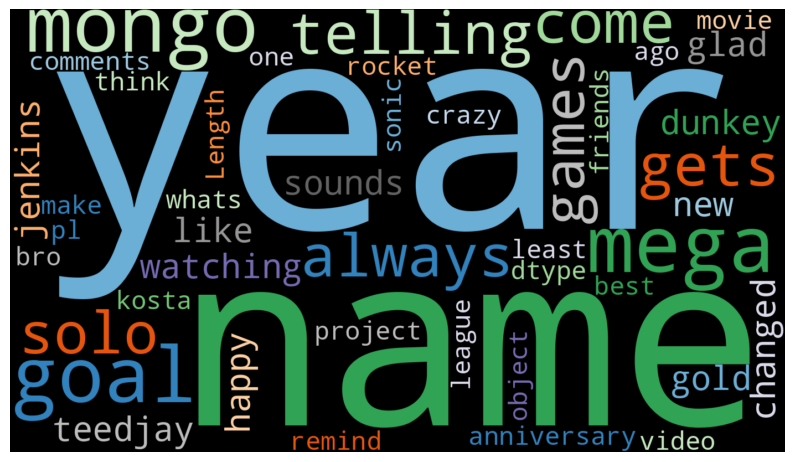

In [45]:
text_analysis('rocket_league_four_comments.txt')

In [46]:
likes('rocket_league_four.txt', 10, False)

amount_of_likes                                            comment
0               22  As someone who plays this game almost daily, i...
1                4  its crazy to see ikon still being used years l...
2                3                                               IKON
3                2  It's crazy how dunkey scored 5 goals for each ...
4                2  "My names sonic, I'm an orange car now" is an ...
5                2  I’m glad Dunkey was able to get his team into ...
6                1  "camera shake" on feels like a deliberate atta...
7                1  I can’t hear a goal without “IKON SCORES IT AG...
8                1        I like that dunkey still makes Gex' s jokes
9                1  Hey Dunkey my mom said I can sleep over on Fri...